Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score


Prepare Data

In [3]:
# load
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# normalize
X_train = x_train.astype('float32') / 255.0
X_test = x_test.astype('float32') / 255.0

#flatten
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

Visualize Images

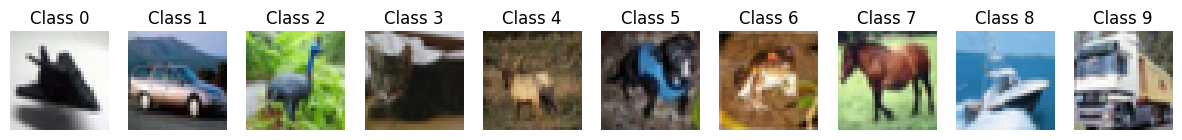

In [ ]:
figure, axes = plt.subplots(1, 10, figsize=(15, 3)) 

for label in range(10):
    idx = np.where(y_train == label)[0][0]
    img = X_train[idx].reshape(32, 32, 3)
    axes[label].imshow(img)
    axes[label].set_title(f"Class {label}")
    axes[label].axis("off")

plt.show()


Train Model + Predictions

In [4]:
clf = LogisticRegression(max_iter=1000, solver='saga')
clf.fit(X_train[:10000], y_train[:10000].flatten())

c:\Users\keert\anaconda3\envs\cs178\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga')

Train Accuracy: 40.54%
Test Accuracy: 33.85%
F1 score: 0.3375
Precision: 0.3378
Recall: 0.3385

Metrics per Class
              precision    recall  f1-score   support

           0       0.41      0.39      0.40      1000
           1       0.41      0.38      0.39      1000
           2       0.25      0.25      0.25      1000
           3       0.22      0.22      0.22      1000
           4       0.29      0.28      0.29      1000
           5       0.27      0.26      0.27      1000
           6       0.36      0.37      0.36      1000
           7       0.39      0.37      0.38      1000
           8       0.41      0.50      0.45      1000
           9       0.37      0.35      0.36      1000

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.34     10000
weighted avg       0.34      0.34      0.34     10000


Confusion matrix


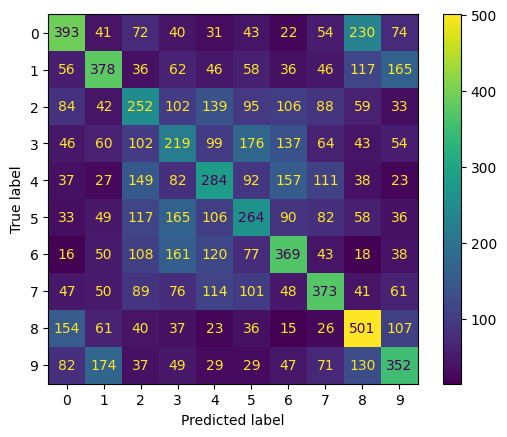

In [15]:
y_pred = clf.predict(X_test)
test_acc = clf.score(X_test, y_test)
train_acc = clf.score(X_train, y_train)


f1 = f1_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"F1 score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print()
print("Metrics per Class")
report = classification_report(y_test, y_pred)
print(report)
print()

print("Confusion matrix")
sklearn_cm = confusion_matrix(y_test, y_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot()

Learning Curve

In [ ]:
training_sizes = [500, 1000, 2000, 5000, 10000]
train_scores = []
test_scores = []

for size in training_sizes:
    model = LogisticRegression(max_iter=500, solver='saga')
    model.fit(X_train[:size], y_train[:size].flatten())

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print(f"{size} Samples: Train Accuracy -> {train_acc * 100:.2f}% and Test Accuracy -> {test_acc * 100:.2f}%")

    
    

c:\Users\keert\anaconda3\envs\cs178\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


500 Samples: Train Accuracy -> 29.24% and Test Accuracy -> 27.83%


c:\Users\keert\anaconda3\envs\cs178\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1000 Samples: Train Accuracy -> 30.65% and Test Accuracy -> 28.63%


c:\Users\keert\anaconda3\envs\cs178\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


2000 Samples: Train Accuracy -> 33.03% and Test Accuracy -> 30.43%


c:\Users\keert\anaconda3\envs\cs178\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


5000 Samples: Train Accuracy -> 36.55% and Test Accuracy -> 32.69%


c:\Users\keert\anaconda3\envs\cs178\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


10000 Samples: Train Accuracy -> 40.58% and Test Accuracy -> 34.98%


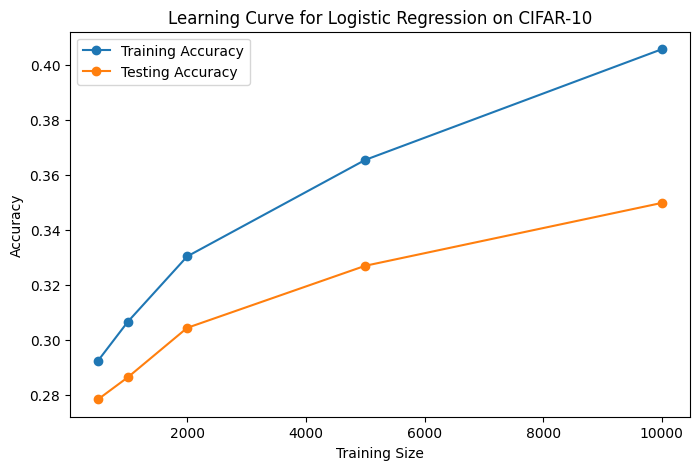

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(training_sizes, train_scores, marker='o', label='Training Accuracy')
plt.plot(training_sizes, test_scores, marker='o', label='Testing Accuracy')
plt.title('Learning Curve for Logistic Regression on CIFAR-10')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()